# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [60]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [2]:
columns = df.columns.tolist()
df[columns].isna().sum()/len(df)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

Look at some basic statistics for numerical variables.

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
92% have a credit history
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
ApplicantIncome are concentrated <20,000 with few larger than 30,000. CoapplicantIncome mode is zero
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.
Skewed to the left, median < mean


Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [36]:
cat_cols = df.columns[df.dtypes == 'object']

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [48]:
for i in cat_cols[1:-1]:
    print(df[i].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


In [130]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



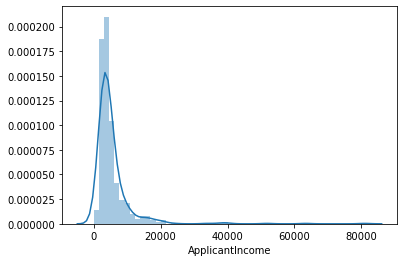

In [61]:
import seaborn as sns

sns.distplot(df.ApplicantIncome, bins = np.linspace(0,80000,int(80000/1500)))

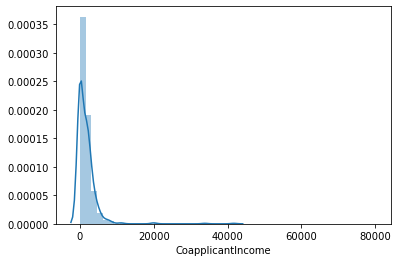

In [63]:
sns.distplot(df.CoapplicantIncome, bins = np.linspace(0,80000,int(80000/1500)))


Look at box plots to understand the distributions. 

[(0.0, 15000.0)]

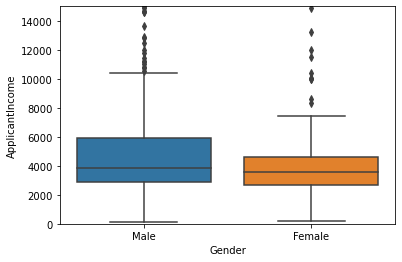

In [70]:
g = sns.boxplot(x=df.Gender,y = df.ApplicantIncome)
g.set(ylim=(0, 15000))

[(0.0, 20000.0)]

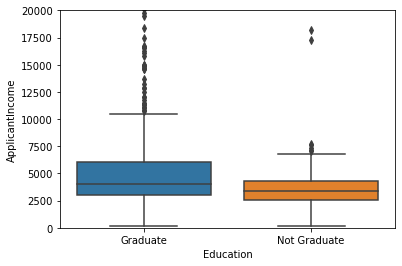

In [69]:
g1 = sns.boxplot(x=df.Education,y = df.ApplicantIncome)
g1.set(ylim=(0, 20000))

Look at the distribution of income segregated  by `Education`

Look at the histogram and boxplot of LoanAmount

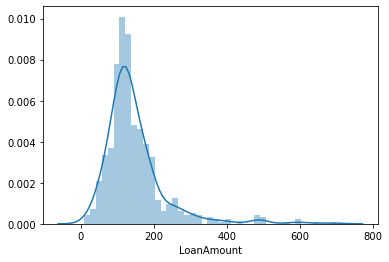

In [71]:
sns.distplot(df.LoanAmount)

[(0.0, 400.0)]

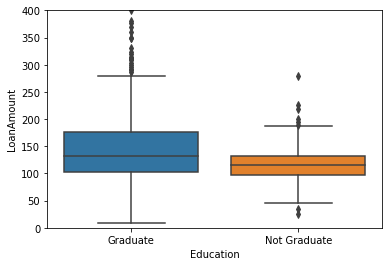

In [76]:
g1 = sns.boxplot(x=df.Education,y = df.LoanAmount)
g1.set(ylim=(0, 400))

[(0.0, 400.0)]

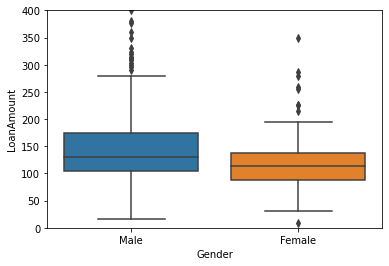

In [77]:
g1 = sns.boxplot(x=df.Gender,y = df.LoanAmount)
g1.set(ylim=(0, 400))

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

In [78]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             68.00
Loan_Amount_Term        0.00
Credit_History          0.00
dtype: float64


In [221]:
print(Q1,Q3)

ApplicantIncome      2877.5
CoapplicantIncome       0.0
LoanAmount            100.0
Loan_Amount_Term      360.0
Credit_History          1.0
Name: 0.25, dtype: float64 ApplicantIncome      5795.00
CoapplicantIncome    2297.25
LoanAmount            168.00
Loan_Amount_Term      360.00
Credit_History          1.00
Name: 0.75, dtype: float64


In [92]:
# Removing outliers using IQR
print(df.shape)
print(df[~((df.ApplicantIncome < Q1.ApplicantIncome - 1.5 * IQR.ApplicantIncome) | (df.ApplicantIncome > Q3.ApplicantIncome + 1.5 * IQR.ApplicantIncome))])
print(df[~((df.CoapplicantIncome < Q1.CoapplicantIncome - 1.5 * IQR.CoapplicantIncome) | (df.CoapplicantIncome > Q3.CoapplicantIncome + 1.5 * IQR.CoapplicantIncome))])

(614, 13)
      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN 

In [101]:
Z = stats.zscore(df[['ApplicantIncome','CoapplicantIncome']])
df[(abs(Z[:,0])<3) & (abs(Z[:,1])<3)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [109]:
table = pd.pivot_table(df, values='LoanAmount', index=['Gender', 'Education'], columns=['Dependents'],aggfunc=np.mean)
print(table)
table = pd.pivot_table(df, values='LoanAmount', index=['Gender', 'Education'], columns=['Property_Area'])
print(table)

Dependents                    0           1           2          3+
Gender Education                                                   
Female Graduate      112.784615  183.800000  122.500000  302.500000
       Not Graduate  116.666667   91.666667   98.000000         NaN
Male   Graduate      151.205128  159.387097  164.220588  191.161290
       Not Graduate  113.403846  144.058824  118.000000  112.384615
Property_Area             Rural   Semiurban       Urban
Gender Education                                       
Female Graduate      126.166667  140.186047  116.827586
       Not Graduate  109.666667  114.000000  108.333333
Male   Graduate      167.320755  156.533835  151.588710
       Not Graduate  124.794872  118.444444  114.750000


In [203]:
columns = df.columns.tolist()
df[columns].isna().sum()/len(df)*100

Loan_ID                    0.000000
Gender                     2.117264
Married                    0.488599
Dependents                 2.442997
Education                  0.000000
Self_Employed              0.000000
ApplicantIncome            0.000000
CoapplicantIncome          0.000000
LoanAmount                 0.000000
Loan_Amount_Term           0.000000
Credit_History             0.000000
Property_Area              0.000000
Loan_Status                0.000000
log_total_Income_binned    0.000000
log_Loan_Amount_binned     0.000000
dtype: float64

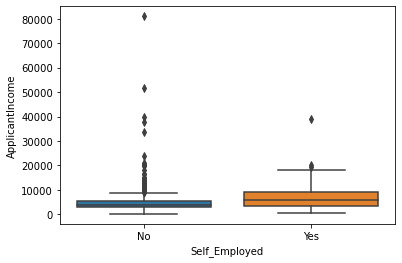

In [155]:
sns.boxplot(df.Self_Employed,df.ApplicantIncome)

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



497     12.0
546     36.0
262     36.0
68      60.0
242     60.0
       ...  
358    480.0
366    480.0
573    480.0
228    480.0
500    480.0
Name: Loan_Amount_Term, Length: 614, dtype: float64

Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

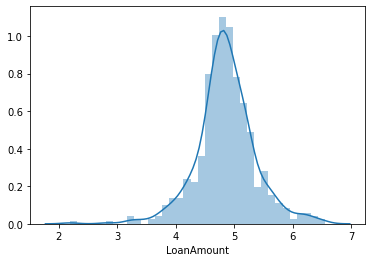

In [110]:
sns.distplot(np.log(df.LoanAmount))

Combine both incomes as total income and take a log transformation of the same.

In [185]:
df = df.astype({'LoanAmount': 'float', 'log_total_Income_binned':'float'})
np.log(df.LoanAmount).sort_values()

568    2.197225
14     2.833213
94     3.218876
133    3.218876
555    3.258097
         ...   
369    6.345636
561    6.396930
155    6.396930
130    6.476972
171    6.551080
Name: LoanAmount, Length: 614, dtype: float64

In [173]:
bins = [1,2,3,4,5,6,7,8]
labels = [1,2,3,4,5,6,7]
df['log_Loan_Amount_binned'] = pd.cut(np.log(df.LoanAmount), bins=bins, labels=labels)

In [182]:
table = pd.pivot_table(df, values='LoanAmount', index=['log_total_Income_binned'], columns=['Credit_History'])
print(table)

Credit_History                  0.0         1.0
log_total_Income_binned                        
2                         74.155488   74.075388
3                        126.999821  123.753840
4                        229.538462  224.110435
5                        600.000000  301.555556
6                        360.000000  490.000000


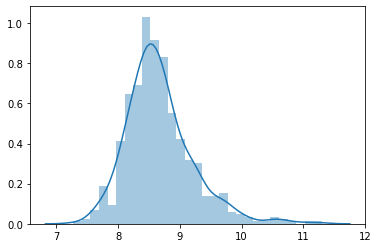

In [112]:
sns.distplot(np.log(df.ApplicantIncome+df.CoapplicantIncome))

In [133]:
bins = [6,7,8,9,10,11,12,13]
labels = [1,2,3,4,5,6,7]
df['log_total_Income_binned'] = pd.cut(np.log(df.ApplicantIncome+df.CoapplicantIncome), bins=bins, labels=labels)
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_total_Income_binned
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,3
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,3
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,3
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,3
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,4
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,3
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,3
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,3
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,5


In [140]:
naLoanAmount_idx = df[df.LoanAmount.isna()].index
mean_loans = df.groupby('log_total_Income_binned')['LoanAmount'].mean()
df.loc[naLoanAmount_idx,'LoanAmount'] = df.loc[naLoanAmount_idx,'log_total_Income_binned'].apply(lambda x: mean_loans[x])

In [145]:
print(df.groupby('log_total_Income_binned')['Loan_Amount_Term'].agg(lambda x:x.value_counts().index[0]))
naLoanTerm_idx = df[df.Loan_Amount_Term.isna()].index
df.loc[naLoanTerm_idx,'Loan_Amount_Term'] = 360.0
df.head(25)

log_total_Income_binned
1      NaN
2    360.0
3    360.0
4    360.0
5    360.0
6    360.0
7      NaN
Name: Loan_Amount_Term, dtype: float64


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_total_Income_binned
0,LP001002,Male,No,0,Graduate,No,5849,0.0,124.663,360.0,1.0,Urban,Y,3
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N,3
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y,3
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y,3
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y,3
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267,360.0,1.0,Urban,Y,4
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y,3
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158,360.0,0.0,Semiurban,N,3
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168,360.0,1.0,Urban,Y,3
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349,360.0,1.0,Semiurban,N,5


In [198]:
naCreditH = df[df.Credit_History.isna()].index
df.loc[naCreditH,"Credit_History"] = 0

In [202]:
naSelfE = df[df.Self_Employed.isna()].index
df.loc[naSelfE,"Self_Employed"] = 'No'

In [211]:
naDepWCo = df[(df.Dependents.isna()) & (df.CoapplicantIncome>0)].index
df.loc[naDepWCo,'Dependents'] = 1
naDepWOCo = df[(df.Dependents.isna()) & (df.CoapplicantIncome==0)].index
df.loc[naDepWOCo,'Dependents'] = 0

In [213]:
naGender = df[df.Gender.isna()].index
df.loc[naGender,'Gender'] = 'Unknown'

In [215]:
df.dropna(inplace=True)

In [216]:
columns = df.columns.tolist()
df[columns].isna().sum()/len(df)*100

Loan_ID                    0.0
Gender                     0.0
Married                    0.0
Dependents                 0.0
Education                  0.0
Self_Employed              0.0
ApplicantIncome            0.0
CoapplicantIncome          0.0
LoanAmount                 0.0
Loan_Amount_Term           0.0
Credit_History             0.0
Property_Area              0.0
Loan_Status                0.0
log_total_Income_binned    0.0
log_Loan_Amount_binned     0.0
dtype: float64

In [223]:
df.Education.value_counts()

Graduate        477
Not Graduate    134
Name: Education, dtype: int64

## 4. Building a Predictive Model

In [219]:
df.dtypes

Loan_ID                      object
Gender                       object
Married                      object
Dependents                   object
Education                    object
Self_Employed                object
ApplicantIncome               int64
CoapplicantIncome           float64
LoanAmount                  float64
Loan_Amount_Term            float64
Credit_History              float64
Property_Area                object
Loan_Status                  object
log_total_Income_binned     float64
log_Loan_Amount_binned     category
dtype: object

# BEGIN HERE

In [616]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [617]:
total_income = np.log(df.ApplicantIncome+df.CoapplicantIncome)
max(total_income)
max_bin = int(max(total_income))+1
min_bin = int(min(total_income))-1
n = max_bin-min_bin+1
bins = np.linspace(min_bin,max_bin,n,dtype=int)
labels = np.linspace(1,n-1,n-1,dtype=int)
df['log_total_Income_binned'] = pd.cut(total_income, bins=bins, labels=labels)


In [157]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_total_Income_binned
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,3
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,3
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,3
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,3
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,4
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,3


In [618]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

frequent_impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent',copy=True)
constant_impute = SimpleImputer(fill_value='Unknown', strategy='constant')
null_impute = SimpleImputer(fill_value=0, strategy='constant')

ct = ColumnTransformer(transformers=[("imputer1", frequent_impute, [2,5,9]),("imputer2", constant_impute, [1]),('imputer3',null_impute,[10])],remainder='passthrough')

In [619]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold, cross_val_score

class loan_amountNA():
    def transform(self,X,y=None,**transform_params):
        
        X_loan_train = X[~X.LoanAmount.isna()][['ApplicantIncome','CoapplicantIncome']]
        y_loan_train = X[~X.LoanAmount.isna()]['LoanAmount']
        X_loan_test = X[X.LoanAmount.isna()][['ApplicantIncome','CoapplicantIncome']]
        y_loan_test = X[X.LoanAmount.isna()]['LoanAmount']

        model_loan = LinearDiscriminantAnalysis()
        #kfold = KFold(n_splits=5)
        #result = cross_val_score(model_loan,X_loan_train,y_loan_train, cv=kfold,scoring='accuracy')
        model_loan.fit(X_loan_train,y_loan_train)
        X.loc[X[X.LoanAmount.isna()].index,'LoanAmount'] = model_loan.predict(X_loan_test)
        return X

    def fit(self,X,y=None,**fit_params):
        return self

    def fit_transform(self,X,y=None):
        self.fit(X)
        return self.transform(X)

class oneDependent():
    def transform(self,X,y=None,**transform_params):
        X = pd.DataFrame(X)
        naDepWCo = X[(X.loc[:,6].isna()) & (X.loc[:,9]>0)].index
        X.loc[naDepWCo,6] = 1
        naDepWOCo = X[(X.loc[:,6].isna()) & (X.loc[:,9]==0)].index
        X.loc[naDepWOCo,6] = 0
        dep3 = X[X.loc[:,6]=='3+'].index
        X.loc[dep3,6] = 3
        X = X.astype({6:'int32',8:'int32',9:'int32'})
        X.loc[:,X.shape[1]] = np.log(X.loc[:,8]+X.loc[:,9])
        #print(X.loc[:,13],X.loc[:,9],X.loc[:,10])
        return X

    def fit(self,X,y=None,**fit_params):
        return self

    def fit_transform(self,X,y=None):
        self.fit(X)
        return self.transform(X)
    
#Modifying the sample axis, e.g. removing samples, does not (yet?) comply with the scikit-learn transformer API. So if you need to do this, you should do it outside any calls to scikit learn, as preprocessing.
#As it is now, the transformer API is used to transform the features of a given sample into something new. This can implicitly contain information from other samples, but samples are never deleted.
#Another option is to attempt to impute the missing values. But again, if you need to delete samples, treat it as preprocessing before using scikit learn
class remainingNA():
    def transform(self,X,y=None,**transform_params):
        return X.dropna()
    def fit(self,X,y=None,**fit_params):
        return self
    def fit_transform(self,X,y=None):
        self.fit(X)
        return self.transform(X)

In [301]:
class loan_amountNA():
    def transform(self,X,y=None,**transform_params):
        naLoanAmount_idx = X[X.LoanAmount.isna()].index
        mean_loans = X.groupby('log_total_Income_binned')['LoanAmount'].mean()
        X.loc[naLoanAmount_idx,'LoanAmount'] = X.loc[naLoanAmount_idx,'log_total_Income_binned'].apply(lambda x: mean_loans[x])
        return X

    def fit(self,X,y=None,**fit_params):
        return self

    def fit_transform(self,X,y=None):
        self.fit(X)
        return self.transform(X)

In [620]:
from sklearn.pipeline import Pipeline

preprocessing = Pipeline([('LoanAmount', loan_amountNA()),('column_transforms',ct),('deps',oneDependent())])
preprocessing = Pipeline([('LoanAmount', loan_amountNA()),('column_transforms',ct),('deps',oneDependent())])

In [621]:
X = df.drop(columns=['Loan_Status'])
y = pd.Series(np.where(df.Loan_Status.values == 'Y', 1, 0), df.index)
X_cols = X.columns.tolist()

In [622]:
X1 = preprocessing.fit_transform(X,y)
X_cols.append('log_total_income')
col_order = [2,5,9,1,10,0,3,4,6,7,8,11,12,13]
X1.columns = [X_cols[i] for i in col_order]
X1

,Married,Self_Employed,Loan_Amount_Term,Gender,Credit_History,Loan_ID,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area,log_total_Income_binned,log_total_income
0,No,No,360,Male,1,LP001002,0,Graduate,5849,0,120,Urban,3,8.674026
1,Yes,No,360,Male,1,LP001003,1,Graduate,4583,1508,128,Rural,3,8.714568
2,Yes,Yes,360,Male,1,LP001005,0,Graduate,3000,0,66,Urban,3,8.006368
3,Yes,No,360,Male,1,LP001006,0,Not Graduate,2583,2358,120,Urban,3,8.505323
4,No,No,360,Male,1,LP001008,0,Graduate,6000,0,141,Urban,3,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,No,No,360,Female,1,LP002978,0,Graduate,2900,0,71,Rural,2,7.972466
610,Yes,No,180,Male,1,LP002979,3,Graduate,4106,0,40,Rural,3,8.320205
611,Yes,No,360,Male,1,LP002983,1,Graduate,8072,240,253,Urban,4,9.025456
612,Yes,No,360,Male,1,LP002984,2,Graduate,7583,0,187,Urban,3,8.933664


In [623]:
X1.drop(columns=['Loan_ID'],inplace=True)
X1 = X1.astype({'LoanAmount': 'float', 'log_total_Income_binned':'int32','Loan_Amount_Term':'int32','ApplicantIncome':'int32','CoapplicantIncome':'int32','Credit_History':'int32','Dependents': 'int32'})
X1.dtypes

Married                     object
Self_Employed               object
Loan_Amount_Term             int32
Gender                      object
Credit_History               int32
Dependents                   int32
Education                   object
ApplicantIncome              int32
CoapplicantIncome            int32
LoanAmount                 float64
Property_Area               object
log_total_Income_binned      int32
log_total_income           float64
dtype: object

# Outliers

In [624]:
X1

,Married,Self_Employed,Loan_Amount_Term,Gender,Credit_History,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area,log_total_Income_binned,log_total_income
0,No,No,360,Male,1,0,Graduate,5849,0,120.0,Urban,3,8.674026
1,Yes,No,360,Male,1,1,Graduate,4583,1508,128.0,Rural,3,8.714568
2,Yes,Yes,360,Male,1,0,Graduate,3000,0,66.0,Urban,3,8.006368
3,Yes,No,360,Male,1,0,Not Graduate,2583,2358,120.0,Urban,3,8.505323
4,No,No,360,Male,1,0,Graduate,6000,0,141.0,Urban,3,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,No,No,360,Female,1,0,Graduate,2900,0,71.0,Rural,2,7.972466
610,Yes,No,180,Male,1,3,Graduate,4106,0,40.0,Rural,3,8.320205
611,Yes,No,360,Male,1,1,Graduate,8072,240,253.0,Urban,4,9.025456
612,Yes,No,360,Male,1,2,Graduate,7583,0,187.0,Urban,3,8.933664


In [625]:
from scipy import stats

# income outliers
z_income = stats.zscore(X1.log_total_income)
income_keep = X1.loc[abs(z_income)<3,'log_total_income'].index
print(X1.loc[abs(z_income)>3,'log_total_income'].index)
y = y[income_keep]
X1 = X1.loc[income_keep,:]

# loan outliers
z_loan = stats.zscore(np.log(X1.LoanAmount))
loan_keep = X1.loc[abs(z_loan)<3,'LoanAmount'].index
print(X1.loc[abs(z_loan)>3,'LoanAmount'].index)
y = y[loan_keep]
X1 = X1.loc[loan_keep,:]
X1

Int64Index([155, 171, 183, 185, 333, 409, 443, 581, 600], dtype='int64')
Int64Index([14, 94, 130, 133, 369, 555, 561, 568], dtype='int64')


,Married,Self_Employed,Loan_Amount_Term,Gender,Credit_History,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area,log_total_Income_binned,log_total_income
0,No,No,360,Male,1,0,Graduate,5849,0,120.0,Urban,3,8.674026
1,Yes,No,360,Male,1,1,Graduate,4583,1508,128.0,Rural,3,8.714568
2,Yes,Yes,360,Male,1,0,Graduate,3000,0,66.0,Urban,3,8.006368
3,Yes,No,360,Male,1,0,Not Graduate,2583,2358,120.0,Urban,3,8.505323
4,No,No,360,Male,1,0,Graduate,6000,0,141.0,Urban,3,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,No,No,360,Female,1,0,Graduate,2900,0,71.0,Rural,2,7.972466
610,Yes,No,180,Male,1,3,Graduate,4106,0,40.0,Rural,3,8.320205
611,Yes,No,360,Male,1,1,Graduate,8072,240,253.0,Urban,4,9.025456
612,Yes,No,360,Male,1,2,Graduate,7583,0,187.0,Urban,3,8.933664


In [626]:
cat_feats = X1.dtypes[X1.dtypes == 'object'].index.tolist()
num_feats = X1.dtypes[~X1.dtypes.index.isin(cat_feats)].index.tolist()

# Using own function in Pipeline
def numFeat(data):
    return data[num_feats]

def catFeat(data):
    return data[cat_feats]

# we will start two separate pipelines for each type of features
keep_num = FunctionTransformer(numFeat)
keep_cat = FunctionTransformer(catFeat)

from sklearn.preprocessing import OneHotEncoder

class ToDenseTransformer():

    # here you define the operation it should perform
    def transform(self, X, y=None, **transform_params):
        return pd.DataFrame(X).to_dense()

    # just return self
    def fit(self, X, y=None, **fit_params):
        return self

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

# use OneHotEncoder
cat_ohe = OneHotEncoder(sparse=False)
to_dense = ToDenseTransformer()

In [528]:
num_feats

['Loan_Amount_Term',
 'Credit_History',
 'Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'log_total_Income_binned',
 'log_total_income']

In [627]:
from sklearn.decomposition import PCA
# don't forget ToDenseTransformer after one hot encoder
cat_pca = PCA(n_components=2)

from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler

#
num_scale = StandardScaler()
# use SelectKBest
num_select = SelectKBest(k=2)

In [628]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import make_column_selector as selector

ct2 = ColumnTransformer(transformers=[('ohe',cat_ohe,selector(dtype_include='object'))],remainder='passthrough')

num_pipeline = Pipeline([('num', keep_num),('scaler',num_scale),('selection',num_select)])
num_pipeline_base = Pipeline([('num', keep_num)])
cat_pipeline = Pipeline([('cat', keep_cat),('ct',ct2),('pca', cat_pca)])
cat_pipeline_base = Pipeline([('cat', keep_cat),('ct',ct2)])#, ('to_dense', to_dense)])
union = FeatureUnion([('num',num_pipeline),('cat',cat_pipeline)])
union_base = FeatureUnion([('num',num_pipeline_base),('cat',cat_pipeline_base)])

In [629]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Use base_model in Task I
XGBoost()
SVM()

logreg = LogisticRegression()
model = Pipeline([('features',union),('model',logreg)])
model_base = Pipeline([('features',union_base),('model',logreg)])

In [632]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size=0.3,random_state=0)
model.fit(X_train,y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('num',
                                                                  FunctionTransformer(func=<function numFeat at 0x00000171785C6550>)),
                                                                 ('scaler',
                                                                  StandardScaler()),
                                                                 ('selection',
                                                                  SelectKBest(k=2))])),
                                                ('cat',
                                                 Pipeline(steps=[('cat',
                                                                  FunctionTransformer(func=<function catFeat at 0x00000171785C68B0>)),
                                                                 ('ct',
                                           

In [633]:
y_predict = model.predict(X_test)

from sklearn import metrics
print('Accuracy score', metrics.accuracy_score(y_test,y_predict))
print('Precision score', metrics.precision_score(y_test,y_predict))
print('Recall score', metrics.recall_score(y_test,y_predict))
print('F1 score', metrics.f1_score(y_test,y_predict))
cf_matrix = metrics.confusion_matrix(y_test, y_predict)
print(cf_matrix)

Accuracy score 0.7611111111111111
Precision score 0.8115942028985508
Recall score 0.8682170542635659
F1 score 0.8389513108614233
[[ 25  26]
 [ 17 112]]


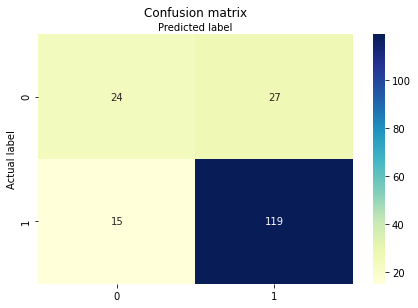

In [559]:
class_names = ['N','Y']
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(cf_matrix),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('cf_matrix_base.png')

Try paramater grid search to improve the results

## Outlier handling and feature selection

In [634]:
from sklearn.model_selection import GridSearchCV

param_grid = {"features__num__selection__k":[2,3,4],
                'features__cat__pca__n_components': [1,2,3],
                'model__penalty':['l1','l2'],
                'model__C':[ 0.01, 0.3, 1.0, 10.0],
                'model__fit_intercept':[True,False],
                'model__solver': ['liblinear'],
                'model__tol': [0.0001,0.00001]
                }
tuned_model = GridSearchCV(model,param_grid,verbose=5)
tuned_model.fit(X_train,y_train)

lty=l1, model__solver=liblinear, model__tol=1e-05, score=0.795, total=   0.0s
[CV] features__cat__pca__n_components=3, features__num__selection__k=4, model__C=1.0, model__fit_intercept=False, model__penalty=l1, model__solver=liblinear, model__tol=1e-05 
[CV]  features__cat__pca__n_components=3, features__num__selection__k=4, model__C=1.0, model__fit_intercept=False, model__penalty=l1, model__solver=liblinear, model__tol=1e-05, score=0.759, total=   0.0s
[CV] features__cat__pca__n_components=3, features__num__selection__k=4, model__C=1.0, model__fit_intercept=False, model__penalty=l1, model__solver=liblinear, model__tol=1e-05 
[CV]  features__cat__pca__n_components=3, features__num__selection__k=4, model__C=1.0, model__fit_intercept=False, model__penalty=l1, model__solver=liblinear, model__tol=1e-05, score=0.723, total=   0.0s
[CV] features__cat__pca__n_components=3, features__num__selection__k=4, model__C=1.0, model__fit_intercept=False, model__penalty=l2, model__solver=liblinear, mode

GridSearchCV(estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('num',
                                                                        Pipeline(steps=[('num',
                                                                                         FunctionTransformer(func=<function numFeat at 0x00000171785C6550>)),
                                                                                        ('scaler',
                                                                                         StandardScaler()),
                                                                                        ('selection',
                                                                                         SelectKBest(k=2))])),
                                                                       ('cat',
                                                                        Pipeline(steps=[('cat',
                    

In [635]:
tuned_model.best_params_

{'features__cat__pca__n_components': 1,
 'features__num__selection__k': 2,
 'model__C': 0.3,
 'model__fit_intercept': False,
 'model__penalty': 'l2',
 'model__solver': 'liblinear',
 'model__tol': 0.0001}

Accuracy score 0.75
Precision score 0.8134328358208955
Recall score 0.8449612403100775
F1 score 0.8288973384030418
[[ 26  25]
 [ 20 109]]


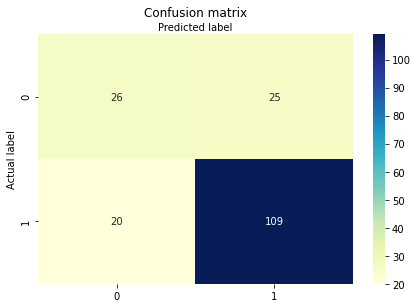

In [636]:
import pickle

filename = 'tuned_logreg.sav'
pickle.dump(tuned_model, open(filename, 'wb'))
y_predict = tuned_model.predict(X_test)

print('Accuracy score', metrics.accuracy_score(y_test,y_predict))
print('Precision score', metrics.precision_score(y_test,y_predict))
print('Recall score', metrics.recall_score(y_test,y_predict))
print('F1 score', metrics.f1_score(y_test,y_predict))
cf_matrix = metrics.confusion_matrix(y_test, y_predict)
print(cf_matrix)

class_names = ['N','Y']
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(cf_matrix),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('cf_matrix_base.png')

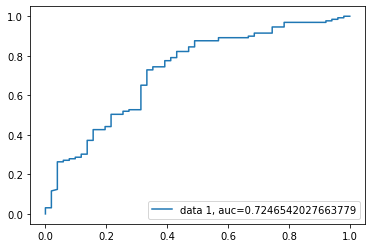

In [637]:

y_pred_proba = tuned_model.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label='data 1, auc='+str(auc))
plt.legend(loc=4)
plt.show()

In [598]:
Pipeline([('union',union)]).fit_transform(X1,y).shape

(597, 9)

In [639]:
import statsmodels.api as sm

X1_sm = sm.add_constant(Pipeline([('union',union)]).fit_transform(X1,y))
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X1_sm,y,test_size=0.25,random_state=0,stratify=y)


logit = sm.Logit(y_train_sm, X_train_sm)

# fit the model
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.502059
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  447
Model:                          Logit   Df Residuals:                      442
Method:                           MLE   Df Model:                            4
Date:                Thu, 03 Sep 2020   Pseudo R-squ.:                  0.1901
Time:                        17:19:55   Log-Likelihood:                -224.42
converged:                       True   LL-Null:                       -277.08
Covariance Type:            nonrobust   LLR p-value:                 7.234e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9630      0.121      7.943      0.000       0.725       1.201
x1             0.9734      0.

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [679]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = best_n_estimators,max_depth = best_max_depth, min_samples_leaf = best_min_samples_leaf)
#rf = RandomForestClassifier()
model_rf = Pipeline([('features',union),('model',rf)])

X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size=0.3,random_state=0)
model_rf.fit(X_train,y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('num',
                                                                  FunctionTransformer(func=<function numFeat at 0x00000171785C6550>)),
                                                                 ('scaler',
                                                                  StandardScaler()),
                                                                 ('selection',
                                                                  SelectKBest(k=2))])),
                                                ('cat',
                                                 Pipeline(steps=[('cat',
                                                                  FunctionTransformer(func=<function catFeat at 0x00000171785C68B0>)),
                                                                 ('ct',
                                           

Accuracy score 0.7666666666666667
Precision score 0.8175182481751825
Recall score 0.8682170542635659
F1 score 0.8421052631578947
[[ 26  25]
 [ 17 112]]


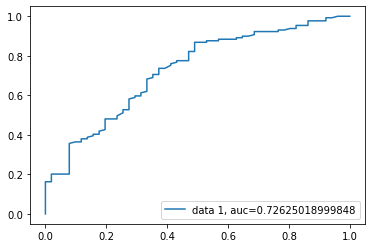

Text(0.5, 15.0, 'Predicted label')

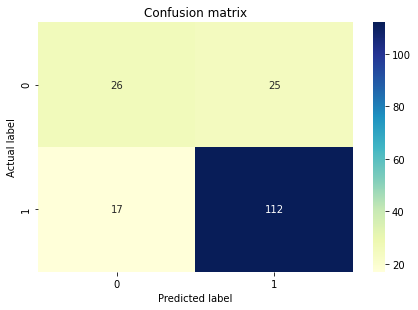

In [686]:
y_predict = model_rf.predict(X_test)

from sklearn import metrics
print('Accuracy score', metrics.accuracy_score(y_test,y_predict))
print('Precision score', metrics.precision_score(y_test,y_predict))
print('Recall score', metrics.recall_score(y_test,y_predict))
print('F1 score', metrics.f1_score(y_test,y_predict))
cf_matrix = metrics.confusion_matrix(y_test, y_predict)
print(cf_matrix)

y_pred_proba = model_rf.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label='data 1, auc='+str(auc))
plt.legend(loc=4)
plt.show()

sns.heatmap(pd.DataFrame(cf_matrix),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [681]:
import pickle

filename = 'tuned_rf.sav'
pickle.dump(model_rf, open(filename, 'wb'))

In [676]:
param_grid = {"features__num__selection__k":[2,3,4],
                'features__cat__pca__n_components': [1,2,3,4],
                'model__n_estimators':[50,100,250,1000],
                'model__max_depth':[None, 5, 10, 15],
                'model__min_samples_leaf':np.arange(1,80,5),
                'model__criterion':['gini', 'entropy'],
                'model__max_samples': [None,0.25,0.5,0.75]
                }
tuned_model_rf = GridSearchCV(model_rf,param_grid,verbose=5,scoring='roc_auc',n_jobs=-1)
tuned_model_rf.fit(X_train,y_train)

Fitting 5 folds for each of 24576 candidates, totalling 122880 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 2162 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 3026 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 3512 tasks      

GridSearchCV(estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('num',
                                                                        Pipeline(steps=[('num',
                                                                                         FunctionTransformer(func=<function numFeat at 0x00000171785C6550>)),
                                                                                        ('scaler',
                                                                                         StandardScaler()),
                                                                                        ('selection',
                                                                                         SelectKBest(k=2))])),
                                                                       ('cat',
                                                                        Pipeline(steps=[('cat',
                    

In [677]:
tuned_model_rf.best_params_

{'features__cat__pca__n_components': 2,
 'features__num__selection__k': 2,
 'model__criterion': 'gini',
 'model__max_depth': 5,
 'model__max_samples': 0.75,
 'model__min_samples_leaf': 26,
 'model__n_estimators': 50}

In [678]:
best_n_estimators = tuned_model_rf.best_params_['model__n_estimators']
best_max_depth = tuned_model_rf.best_params_['model__max_depth']
best_min_samples_leaf = tuned_model_rf.best_params_['model__min_samples_leaf']

## XGBOOST

In [690]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
#rf = RandomForestClassifier()
model_xgb = Pipeline([('features',union),('model',xgb)])

X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size=0.3,random_state=0)
model_xgb.fit(X_train,y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('num',
                                                                  FunctionTransformer(func=<function numFeat at 0x00000171785C6550>)),
                                                                 ('scaler',
                                                                  StandardScaler()),
                                                                 ('selection',
                                                                  SelectKBest(k=2))])),
                                                ('cat',
                                                 Pipeline(steps=[('cat',
                                                                  FunctionTransformer(func=<function catFeat at 0x00000171785C68B0>)),
                                                                 ('ct',
                                           

In [693]:
param_grid = {"features__num__selection__k":[2,3,4],
                'features__cat__pca__n_components': [1,2,3,4],
                'model__booster':['gbtree','gblinear'],
                'model__eta':[0.001, 0.03, 0.1, 0.5],
                'model__gamma':[0, 0.5, 5, 100],
                'model__max_depth':[None, 5, 10, 15],
                'model__colsample_bytree': [0.25,0.5,0.75,1],
                'model__lambda': [0.25,1.0,10],
                'model__alpha': [0, 1.0 , 5.0]
                }
tuned_model_xgb = GridSearchCV(model_xgb,param_grid,verbose=5,scoring='roc_auc',n_jobs=-1)
tuned_model_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 55296 candidates, totalling 276480 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 1536 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 2328 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 3264 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 4344 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 5568 tasks      | elapsed:   57.0s
[Parallel(n_jobs=-1)]: Done 6936 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 8448 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 10104 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 11904 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 13848 tasks

GridSearchCV(estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('num',
                                                                        Pipeline(steps=[('num',
                                                                                         FunctionTransformer(func=<function numFeat at 0x00000171785C6550>)),
                                                                                        ('scaler',
                                                                                         StandardScaler()),
                                                                                        ('selection',
                                                                                         SelectKBest(k=2))])),
                                                                       ('cat',
                                                                        Pipeline(steps=[('cat',
                    

In [695]:
tuned_model_xgb.best_params_

{'features__cat__pca__n_components': 2,
 'features__num__selection__k': 4,
 'model__alpha': 0,
 'model__booster': 'gbtree',
 'model__colsample_bytree': 0.75,
 'model__eta': 0.001,
 'model__gamma': 5,
 'model__lambda': 0.25,
 'model__max_depth': None}

In [699]:
import pickle

filename = 'tuned_xgb.sav'
pickle.dump(tuned_model_xgb, open(filename, 'wb'))

Accuracy score 0.7611111111111111
Precision score 0.8161764705882353
Recall score 0.8604651162790697
F1 score 0.8377358490566038
[[ 26  25]
 [ 18 111]]


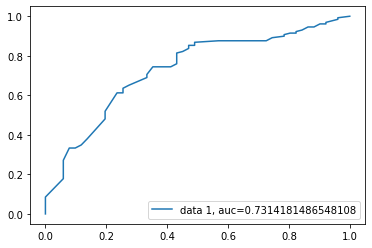

Text(0.5, 15.0, 'Predicted label')

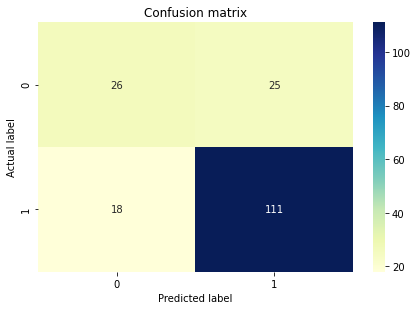

In [698]:
y_predict = tuned_model_xgb.predict(X_test)

from sklearn import metrics
print('Accuracy score', metrics.accuracy_score(y_test,y_predict))
print('Precision score', metrics.precision_score(y_test,y_predict))
print('Recall score', metrics.recall_score(y_test,y_predict))
print('F1 score', metrics.f1_score(y_test,y_predict))
cf_matrix = metrics.confusion_matrix(y_test, y_predict)
print(cf_matrix)

y_pred_proba = tuned_model_xgb.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label='data 1, auc='+str(auc))
plt.legend(loc=4)
plt.show()

sns.heatmap(pd.DataFrame(cf_matrix),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

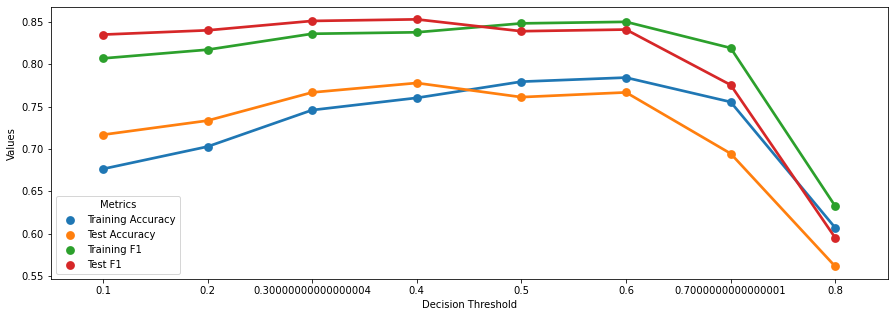

In [638]:
train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []

#for thresh in np.linspace(0.1,0.9,8): ## Sweeping from threshold of 0.1 to 0.9
for thresh in np.arange(0.1,0.9,0.1): ## Sweeping from threshold of 0.1 to 0.9
    logreg_clf = LogisticRegression(solver='liblinear')
    model.fit(X_train,y_train)
    
    y_pred_train_thresh = model.predict_proba(X_train)[:,1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)

    train_acc = metrics.accuracy_score(y_train,y_pred_train)
    train_f1 = metrics.f1_score(y_train,y_pred_train)
    
    y_pred_test_thresh = model.predict_proba(X_test)[:,1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int) 
    
    test_acc = metrics.accuracy_score(y_test,y_pred_test)
    test_f1 = metrics.f1_score(y_test,y_pred_test)
    
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)
    
    
Threshold_logreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies, "Training F1": train_f1_scores, "Test F1":test_f1_scores, "Decision Threshold": thresholds }
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

plot_df = Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [ ]:
import requests
import json


json_data = json.loads(df.loc[0].to_json())
print(json_data)

URL = 'http://127.0.0.1:5000/prediction'
r = requests.post(url = URL, json = json_data)
print(r.status_code)